# 이항분포 (Binomial Distribution)

성공확률이 $\theta$ 인 베르누이를 N번 시행

- 이산확률분포

(표현)

$$ \text{Bin}(x;N,\theta) $$

(수식)

$$ \text{Bin}(x;N,\theta) = \binom N x  \theta^x(1-\theta)^{N-x} $$

(참고)
$$\binom N x =\dfrac{N!}{x!(N-x)!}$$
$$N! = N\cdot (N-1) \cdots 2 \cdot 1$$


**X의 의미** Y라는 베르누이분포가 있을 때, N번 중 성공한 횟수는 N개의 샘플 값의 총합(성공=1, 실패=0, 1의 합)

$$Y \sim \text{Bern}(y;\theta)$$
$$ x = \sum_{i=1}^N y_i $$

## 이항 분포의 모멘트

#### 기대값
$$ \text{E}[X] = N\theta $$

(증명)
$$ \text{E}[X] = \text{E} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{E}[ \text{Bern}_i ] = N\theta $$

#### 분산
$$ \text{Var}[X] = N\theta(1-\theta)$$

(증명)

$$ \text{Var}[X] = \text{Var} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{Var}[ \text{Bern}_i ] = N\theta(1-\theta)$$

### 이항 분포 만들기

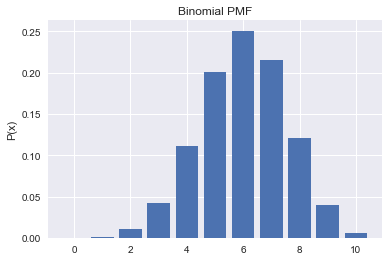

In [2]:
N = 10 # 실행 횟수
theta = 0.6 # 성공(1)의 비율, 모수설정
rv = sp.stats.binom(N, theta)

xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align = "center")
plt.ylabel("P(x)")
plt.title("Binomial PMF")

plt.show()

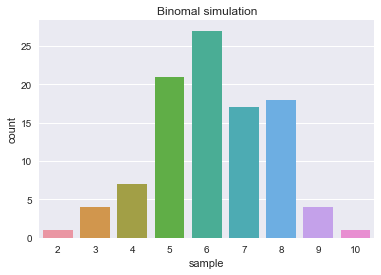

In [4]:
# Simulation
np.random.seed(0) # 난수 seed 설정
x = rv.rvs(100) # 이항 분포로 100개의 난수 설정
sns.countplot(x) # 난수의 갯수가 표시되는 플롯 생성

plt.title("Binomal simulation")
plt.xlabel("sample")
plt.show()

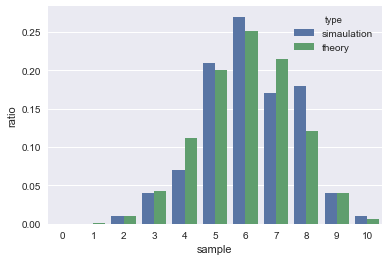

In [5]:
# 이론과 시뮬레이션 동시 표현
y = np.bincount(x, minlength = N + 1)/float(len(x))
df = pd.DataFrame({"theory": rv.pmf(xx), "simaulation":y}).stack()
df = df.reset_index()
df.columns = ["sample", "type", "ratio"]
df.pivot("sample", "type", "ratio")

sns.barplot(x="sample", y="ratio", hue="type", data=df)
plt.show()